# Word2Vec Nedir?


**Word2Vec** , kelimeleri çeşitli yöntemlerle vektörleştirerek vektör uzayında ifade etmeye çalışan tahmin temelli (prediction-based) bir doküman temsil modelidir.


Vektörleştirme işleminden önce kendisine verilen dokümanı tarayarak **hedef kelimenin daha çok hangi kelimelerle birlikte geçtiğini** tespit eder. Bu sayede kelimelerin anlamsal olarak birbirleri ile yakınlıklarını kaybetmemiş olur. Her kelimenin, kendisine anlamsal olarak en yakın kelimeleri içeren bir vektörü vardır.


In [1]:
import string
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec

from sklearn.manifold import TSNE

## Veriyi Okuma, Veri Hakkında Bilgi Alma ve Ön İşleme

In [17]:
news = pd.read_csv("reddit_worldnews_start_to_2016-11-22.csv")

In [18]:
with pd.option_context("display.max_colwidth",None):
    display(news.head())

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [19]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   subreddit     509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


### Veri Ön İşleme 

In [20]:
def count_words(text):
    words = nltk.word_tokenize(text)       
    return len(words)

news["word_count"] = np.vectorize(count_words)(news["title"])
total_word_count = news["word_count"].sum()

print("Toplam Kelime Sayısı:", total_word_count)

Toplam Kelime Sayısı: 7914468


In [6]:
stop_words = set(stopwords.words("english"))
punct_to_remove = string.punctuation
news_titles_list = []

def data_preprocessing(text):
    text = text.lower()       # Lowercasing
    text = text.translate(str.maketrans('', '', punct_to_remove))    # Removing punctuation

    words = nltk.word_tokenize(text)           # Tokenization
    words = ' '.join([word for word in words if word not in (stop_words)])
    news_titles_list.append(nltk.word_tokenize(words)) 
    return words

news["title"] = np.vectorize(data_preprocessing)(news["title"])

In [7]:
news_titles_list

[['scores', 'killed', 'pakistan', 'clashes'],
 ['scores', 'killed', 'pakistan', 'clashes'],
 ['japan', 'resumes', 'refuelling', 'mission'],
 ['us', 'presses', 'egypt', 'gaza', 'border'],
 ['jumpstart', 'economy', 'give', 'health', 'care'],
 ['council', 'europe', 'bashes', 'euun', 'terror', 'blacklist'],
 ['hay',
  'presto',
  'farmer',
  'unveils',
  'illegal',
  'mocktudor',
  'castle',
  'tried',
  'hide',
  'behind',
  '40ft',
  'hay',
  'bales'],
 ['strikes', 'protests', 'gridlock', 'polandukraine', 'border'],
 ['un', 'mismanagement', 'program'],
 ['nicolas', 'sarkozy', 'threatens', 'sue', 'ryanair'],
 ['us',
  'plans',
  'missile',
  'shields',
  'polish',
  'town',
  'met',
  'resistance',
  'video'],
 ['archbishop',
  'canterbury',
  'calls',
  'new',
  'law',
  'punish',
  'thoughtless',
  'cruel',
  'words',
  'times',
  'online'],
 ['top', 'us', 'envoy', 'violence', 'kenya', 'ethnic', 'cleansing'],
 ['team',
  'building',
  'float',
  'commemorate',
  'holocaust',
  'rio',
  

### Ön işleme aşaması sonrası veri setinde kaç kelime kaldı?


In [21]:
word_count_in_title_list = sum(len(text) for text in news_titles_list)
print("Veri setindeki kelime sayısı: {}".format(word_count_in_title_list))

Veri setindeki kelime sayısı: 427801


### Word2Vec Modelinin Eğitilmesi

In [25]:
word2vec_model=Word2Vec(news_titles_list,window=5,min_count=5,workers=8,batch_words=30000,sg=1) 

In [23]:
word2vec_model.wv["israel"]

array([-3.2392275e-01,  8.4358007e-01,  4.0568072e-01,  9.5253728e-02,
       -7.7793561e-02, -8.3519822e-01,  3.0985266e-01,  1.4481597e+00,
       -5.5885816e-01, -5.5267996e-01, -3.5573962e-01, -1.0490217e+00,
       -1.6086672e-01,  2.6838386e-01,  4.2002179e-02, -5.1950908e-01,
        4.4696254e-01, -7.1014982e-01, -6.0401533e-02, -1.5022162e+00,
        4.6765184e-01,  4.7241876e-01,  7.1055275e-01, -1.1185790e-01,
       -3.1850263e-01,  1.0295672e-01, -2.5458223e-01, -3.0275604e-01,
       -9.6061057e-01, -1.7486319e-01,  6.4846444e-01,  2.6964802e-01,
       -1.6192291e-02, -5.4412919e-01, -3.3021107e-01,  6.1981159e-01,
        3.6677992e-01, -5.0507128e-01, -5.5476713e-01, -1.4111353e+00,
        1.6733691e-01, -6.6753089e-01, -8.2405233e-01, -2.7316985e-01,
        6.1507165e-01, -3.6402634e-01, -8.1432521e-01,  2.7373724e-04,
        2.3189557e-01,  5.6727135e-01,  1.3453643e-01, -6.4733022e-01,
       -7.0089436e-01, -3.5364804e-01, -6.4136225e-01,  6.0840768e-01,
      

In [24]:
word2vec_model.wv.most_similar("israel")

[('hamas', 0.9995720982551575),
 ('gaza', 0.9994751214981079),
 ('israeli', 0.9994047284126282),
 ('palestinians', 0.9992896318435669),
 ('conflict', 0.9992685317993164),
 ('palestinian', 0.9992147088050842),
 ('civilians', 0.9991822838783264),
 ('children', 0.999171793460846),
 ('ceasefire', 0.9991406202316284),
 ('support', 0.9991402626037598)]

### Modelin 2 Boyutta Görselleştirilmesi

C:\Users\ensar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ensar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


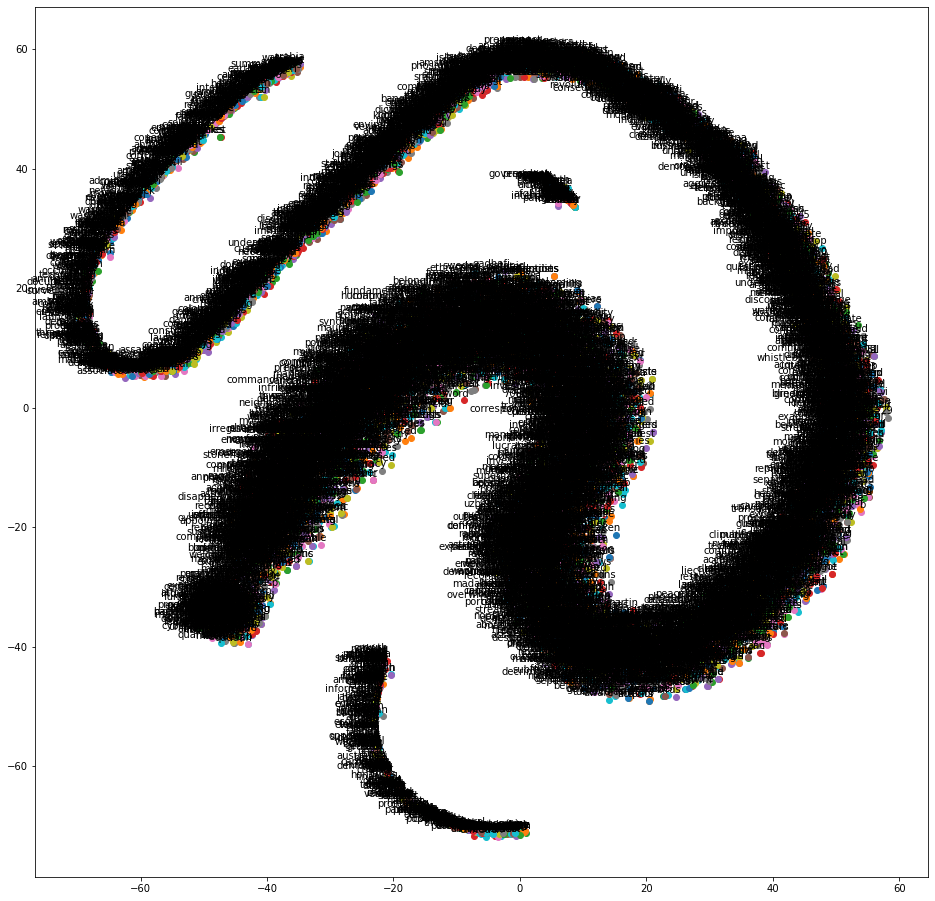

In [16]:
labels = []
tokens = []

for word in word2vec_model.wv.index_to_key:
    tokens.append(word2vec_model.wv[word])
    labels.append(word)

tsne_model = TSNE(random_state=0)

new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

# W2V Parametreleri

### sentences
Sentences modele sokulacak olan cümlelerdir. Listelerin listesi tipinde olmalıdır.


### vector_size
Her kelime için oluşturulacak olan vektörün boyutudur. Default değeri 100. Fazla yüksek verilirse hedef kelime ile alakasız olan kelimeler de vektöre dahil edilebilir.

### min_count
Frekansı bu parametreye girdi olarak verilen sayıdan az olan kelimeler modele sokulmaz. Varsayılan değer 5'tir.

### max_vocab_size
Dokümanda aşırı fazla eşsiz kelime mevcut varsa modelimiz çok yavaş çalışabilir. Bu parametre vocabulary'mizin ne kadar geniş olacağını sınırlar. Default değer None'dır, yani bir sınır yoktur. Eşsiz kelime sayımız bu parametreye vereceğimiz girdideki sayıdan fazlaysa bu kelimeler arasından frekansı en düşük olanlar atılmaya başlanır.

Kelimelerin RAM'de kapladığı alana bakacak olursak her 10 milyon kelime 1 GB RAM alana ihtiyaç duyar.

### workers

Modeli eğitirken kullanılacak iş parçacığı sayısını ifade eder. Daha fazla parçacık kullanmak hızlı sonuçlar almanıza yardımcı olur.
Default değeri 3'tür.

### sg

Modelde kullanılacak olan algoritma türünü temsil eder. Default olarak 0'dır yani CBOW algoritması kullanılır. 

Wod2Vec'i geliştiren Tomas Mikolov'a göre CBOW büyük eğitim verileri ve daha sık kullanılan kelimelerle daha iyi sonuç verirken, SG daha küçük miktarlarda eğitim verisiyle iyi çalışır ve daha az sıklıktaki yani nadir kelimeleri daha iyi temsil eder.

### batch_words

İş parçacıklarına gönderilecek kelime partilerinin boyutu. Default olarak 10000 kelime gönderilir.

### shrink_windows

window size ın tamamını kullanmamak için kullanılır. Bazı durumlarda windowdaki bütün kelimeler önemli değildir.

1 ile window size arasında değerleri rastgele alır.

### negative ve ns_exponent

Negatif sampling kullanılırken toplama dahil edilecek kelime sayısını ifade eder. ns_exponent ise corpus içerisindeki hangi sıklıktaki kelimelerin negatif sampling örnekleminde yer alacağını belirler.

Eğer 1 verirsek frekanslara göre seçim yapar yani yüksek frekanstaki kelimelere ağırlık verebilir.

Eğer 0 verirsek corpustaki tüm kelimeleri eşit ağırlıkla alır ve rastgele kelimeler seçer.

Eğer negatif bir değer verirsek düşük frekanstaki kelimeleri yüksek frekanslı kelimelerden daha fazla seçer.

### seed

Rastgele sayı üreteci için çekirdek değeridir. Kelime vektörleri bu çekirdekler ile oluşturulur. Farklı modeller üzerinde aynı seed değeri kullanılırsa sonuç vektörleri büyük oranda aynı olacaktır. Eğer tamamen deterministik bir sonuç isterseniz workers parametresini 1 ayarlamalısınız. Bu sayede iki modelinizin vektörleri tamamen aynı olacaktır.  